In [12]:
# Import all necessary libraries 

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
sns.set()

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
pd.set_option('display.max_rows', None)


In [14]:
fd= pd.read_csv("https://raw.githubusercontent.com/hippoghost/data-science-projects/master/adulthood/adulthood_dataframe.csv")

## EXPLORING DATA

## Inspecting DataFrame

In [15]:
full=fd

In [16]:
full.shape

(2897, 72)

In [17]:
full.head(5)

,tr_available_markets,tr_disc_number,tr_duration_ms,tr_explicit,tr_href,tr_id,tr_is_local,tr_name,tr_popularity,tr_preview_url,tr_track_number,tr_type,tr_uri,tr_track_artist_id,tr_album_album_type,tr_album_artists,tr_album_available_markets,tr_album_external_urls_spotify,tr_album_href,tr_album_id,tr_album_images,tr_album_name,tr_album_release_date,tr_album_release_date_precision,tr_album_total_tracks,tr_album_type,tr_album_uri,tr_external_ids_isrc,tr_external_urls_spotify,al_album_group,al_album_type,al_artists,al_available_markets,al_href,al_id,al_images,al_name,al_release_date,al_release_date_precision,al_total_tracks,al_type,al_uri,al_artist_id,al_external_urls_spotify,ar_href,ar_id,ar_images,ar_name,ar_popularity,ar_type,ar_uri,ar_external_urls_spotify,ar_followers_href,ar_followers_total,tf_danceability,tf_energy,tf_key,tf_loudness,tf_mode,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_type,tf_id,tf_uri,tf_track_href,tf_analysis_url,tf_duration_ms,tf_time_signature
0,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,38826,False,https://api.spotify.com/v1/tracks/6gUejkYukr6D...,6gUejkYukr6D9MfZaJawPS,False,"Churchill’s Speech - Live in Mexico City, Pala...",41,https://p.scdn.co/mp3-preview/501552516390e845...,1,track,spotify:track:6gUejkYukr6D9MfZaJawPS,6mdiAmATAx73kdxrNrnlao,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/6IVkf5av5jnraZp...,https://api.spotify.com/v1/albums/6IVkf5av5jnr...,6IVkf5av5jnraZpLPszoZR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,day,17,album,spotify:album:6IVkf5av5jnraZpLPszoZR,GBCHB2000001,https://open.spotify.com/track/6gUejkYukr6D9Mf...,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://api.spotify.com/v1/albums/6IVkf5av5jnr...,6IVkf5av5jnraZpLPszoZR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,day,17.0,album,spotify:album:6IVkf5av5jnraZpLPszoZR,6mdiAmATAx73kdxrNrnlao,https://open.spotify.com/album/6IVkf5av5jnraZp...,https://api.spotify.com/v1/artists/6mdiAmATAx7...,6mdiAmATAx73kdxrNrnlao,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Iron Maiden,77.0,artist,spotify:artist:6mdiAmATAx73kdxrNrnlao,https://open.spotify.com/artist/6mdiAmATAx73kd...,NaN,6201079.0,0.338,0.904,5,-12.851,0,0.1610,0.433000,0.13400,0.910,0.0394,85.128,audio_features,6gUejkYukr6D9MfZaJawPS,spotify:track:6gUejkYukr6D9MfZaJawPS,https://api.spotify.com/v1/tracks/6gUejkYukr6D...,https://api.spotify.com/v1/audio-analysis/6gUe...,38827,3
1,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,298789,False,https://api.spotify.com/v1/tracks/6qiWdPh2DnoE...,6qiWdPh2DnoEdOmX2g6t3W,False,"Aces High - Live in Mexico City, Palacio de lo...",43,https://p.scdn.co/mp3-preview/336efb9857640a63...,2,track,spotify:track:6qiWdPh2DnoEdOmX2g6t3W,6mdiAmATAx73kdxrNrnlao,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/6IVkf5av5jnraZp...,https://api.spotify.com/v1/albums/6IVkf5av5jnr...,6IVkf5av5jnraZpLPszoZR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,day,17,album,spotify:album:6IVkf5av5jnraZpLPszoZR,GBCHB2000002,https://open.spotify.com/track/6qiWdPh2DnoEdOm...,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://api.spotify.com/v1/albums/6IVkf5av5jnr...,6IVkf5av5jnraZpLPszoZR,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,day,17.0,album,spotify:album:6IVkf5av5jnraZpLPszoZR,6mdiAmATAx73kdxrNrnlao,https://open.spotify.com/album/6IVkf5av5jnraZp...,https://api.spotify.com/v1/artists/6mdiAmATAx7...,6mdiAmATAx7

In [18]:
full.tail(1)

,tr_available_markets,tr_disc_number,tr_duration_ms,tr_explicit,tr_href,tr_id,tr_is_local,tr_name,tr_popularity,tr_preview_url,tr_track_number,tr_type,tr_uri,tr_track_artist_id,tr_album_album_type,tr_album_artists,tr_album_available_markets,tr_album_external_urls_spotify,tr_album_href,tr_album_id,tr_album_images,tr_album_name,tr_album_release_date,tr_album_release_date_precision,tr_album_total_tracks,tr_album_type,tr_album_uri,tr_external_ids_isrc,tr_external_urls_spotify,al_album_group,al_album_type,al_artists,al_available_markets,al_href,al_id,al_images,al_name,al_release_date,al_release_date_precision,al_total_tracks,al_type,al_uri,al_artist_id,al_external_urls_spotify,ar_href,ar_id,ar_images,ar_name,ar_popularity,ar_type,ar_uri,ar_external_urls_spotify,ar_followers_href,ar_followers_total,tf_danceability,tf_energy,tf_key,tf_loudness,tf_mode,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_type,tf_id,tf_uri,tf_track_href,tf_analysis_url,tf_duration_ms,tf_time_signature
2896,"['CA', 'US']",5,154795,False,https://api.spotify.com/v1/tracks/31ff2s4BUKVx...,31ff2s4BUKVx0i0EKHM2Gc,False,(Anesthesia) – Pulling Teeth (Live at The Keys...,14,https://p.scdn.co/mp3-preview/d7041eea208c0bf5...,9,track,spotify:track:31ff2s4BUKVx0i0EKHM2Gc,2ye2Wgw4gimLv2eAKyk1NB,album,[{'external_urls': {'spotify': 'https://open.s...,"['CA', 'US']",https://open.spotify.com/album/7GttoSWxEi5lZvI...,https://api.spotify.com/v1/albums/7GttoSWxEi5l...,7GttoSWxEi5lZvIWeSrh6n,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Kill 'Em All (Deluxe Remaster),1983-07-25,day,54,album,spotify:album:7GttoSWxEi5lZvIWeSrh6n,QMKHM1600066,https://open.spotify.com/track/31ff2s4BUKVx0i0...,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['CA', 'US']",https://api.spotify.com/v1/albums/7GttoSWxEi5l...,7GttoSWxEi5lZvIWeSrh6n,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Kill 'Em All (Deluxe Remaster),1983-07-25,day,54.0,album,spotify:album:7GttoSWxEi5lZvIWeSrh6n,2ye2Wgw4gimLv2eAKyk1NB,https://open.spotify.com/album/7GttoSWxEi5lZvI...,https://api.spotify.com/v1/artists/2ye2Wgw4gim...,2ye2Wgw4gimLv2eAKyk1NB,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Metallica,85.0,artist,spotify:artist:2ye2Wgw4gimLv2eAKyk1NB,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,NaN,17257877.0,0.22,0.877,2,-7.49,1,0.06,0.689,0.84,0.868,0.55,101.343,audio_features,31ff2s4BUKVx0i0EKHM2Gc,spotify:track:31ff2s4BUKVx0i0EKHM2Gc,https://api.spotify.com/v1/tracks/31ff2s4BUKVx...,https://api.spotify.com/v1/audio-analysis/31ff...,154796,4


In [19]:
#full.info()

In [20]:
#full.dtypes

## Trimming redundant columns

In [21]:
full['ar_name'].unique()

array(['Iron Maiden', nan, 'Bruce Dickinson', 'Blind Guardian',
       'Iced Earth', 'Demons & Wizards', 'Theatre Of Tragedy',
       'Metallica'], dtype=object)

In [22]:
#Using the columns attribute to check DataFrame's columns

full.columns

Index(['tr_available_markets', 'tr_disc_number', 'tr_duration_ms',
       'tr_explicit', 'tr_href', 'tr_id', 'tr_is_local', 'tr_name',
       'tr_popularity', 'tr_preview_url', 'tr_track_number', 'tr_type',
       'tr_uri', 'tr_track_artist_id', 'tr_album_album_type',
       'tr_album_artists', 'tr_album_available_markets',
       'tr_album_external_urls_spotify', 'tr_album_href', 'tr_album_id',
       'tr_album_images', 'tr_album_name', 'tr_album_release_date',
       'tr_album_release_date_precision', 'tr_album_total_tracks',
       'tr_album_type', 'tr_album_uri', 'tr_external_ids_isrc',
       'tr_external_urls_spotify', 'al_album_group', 'al_album_type',
       'al_artists', 'al_available_markets', 'al_href', 'al_id', 'al_images',
       'al_name', 'al_release_date', 'al_release_date_precision',
       'al_total_tracks', 'al_type', 'al_uri', 'al_artist_id',
       'al_external_urls_spotify', 'ar_href', 'ar_id', 'ar_images', 'ar_name',
       'ar_popularity', 'ar_type', 'ar_uri', '

In [23]:
# dropping columns that won't be used for analysis

full=full.drop(columns=['tr_available_markets', 'tr_disc_number',
       'tr_href', 'tr_id', 'tr_is_local', 'tr_preview_url', 'tr_type',
       'tr_uri', 'tr_track_artist_id', 'tr_album_album_type',
       'tr_album_artists', 'tr_album_available_markets',
       'tr_album_external_urls_spotify', 'tr_album_href', 'tr_album_id',
       'tr_album_images', 'tr_album_name', 'tr_album_release_date',
       'tr_album_release_date_precision', 'tr_album_total_tracks',
       'tr_album_type', 'tr_album_uri', 'tr_external_ids_isrc',
       'tr_external_urls_spotify', 'al_album_group',
       'al_artists', 'al_available_markets', 'al_href', 'al_id', 'al_images','al_release_date_precision',
                       'al_type', 'al_uri', 'al_artist_id',
       'al_external_urls_spotify', 'ar_href', 'ar_id', 'ar_images','ar_type', 'ar_uri', 'ar_external_urls_spotify',
       'ar_followers_href','tf_type', 'tf_id', 'tf_uri',
        'tf_duration_ms' ,'tf_track_href','tf_analysis_url','tf_time_signature'])
#'

### Rearranging columns for convenience of analysis

In [24]:
#checking columns sequence

cols = list(full.columns.values)
cols

['tr_duration_ms',
 'tr_explicit',
 'tr_name',
 'tr_popularity',
 'tr_track_number',
 'al_album_type',
 'al_name',
 'al_release_date',
 'al_total_tracks',
 'ar_name',
 'ar_popularity',
 'ar_followers_total',
 'tf_danceability',
 'tf_energy',
 'tf_key',
 'tf_loudness',
 'tf_mode',
 'tf_speechiness',
 'tf_acousticness',
 'tf_instrumentalness',
 'tf_liveness',
 'tf_valence',
 'tf_tempo']

In [25]:
# rearranging columns

full = full[['ar_name','ar_popularity','tr_name','tr_popularity','al_name','al_release_date',
                     'al_total_tracks','al_album_type','ar_followers_total','tr_duration_ms',
                     'tr_track_number','tf_danceability','tf_energy','tf_loudness','tf_speechiness','tf_acousticness',
                    'tf_instrumentalness','tf_liveness','tf_valence','tf_tempo','tf_key','tf_mode','tr_explicit']]

In [26]:
# Checking dataset
full.head(1)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit
0,Iron Maiden,77.0,"Churchill’s Speech - Live in Mexico City, Pala...",41,"Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,17.0,album,6201079.0,38826,1,0.338,0.904,-12.851,0.161,0.433,0.134,0.91,0.0394,85.128,5,0,False


In [27]:
#inspecting DataFrame's shape, after removing unessecary information

full.shape

(2897, 23)

##  Descriptive statistics

In [28]:
full.describe()

,ar_popularity,tr_popularity,al_total_tracks,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode
count,2430.000000,2897.000000,2430.000000,2.430000e+03,2.897000e+03,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.00000
mean,69.677366,24.526061,29.629218,7.356073e+06,3.362372e+05,6.857094,0.352973,0.870427,-6.839827,0.097163,0.051720,0.183767,0.412118,0.307665,123.517999,5.336210,0.52399
std,14.425074,15.030934,35.869778,7.394296e+06,1.318322e+05,4.617812,0.129665,0.158822,2.770297,0.073721,0.161107,0.285296,0.340983,0.185042,30.077134,3.435903,0.49951
min,46.000000,0.000000,6.000000,8.870800e+04,1.632500e+04,1.000000,0.075100,0.053300,-29.042000,0.024200,0.000001,0.000000,0.021300,0.000000,50.384000,0.000000,0.00000
25%,56.000000,15.000000,11.000000,4.228070e+05,2.558660e+05,3.000000,0.257000,0.841000,-7.843000,0.049000,0.000131,0.000741,0.115000,0.159000,99.366000,2.000000,0.00000
50%,77.000000,23.000000,17.000000,6.201079e+06,3.192400e+05,6.000000,0.326000,0.931000,-6.384000,0.077000,0.001160,0.019000,0.262000,0.280000,119.567000,5.000000,1.00000
75%,85.000000,35.000000,26.000000,1.725788e+07,4.048000e+05,9.000000,0.446000,0.970000,-5.205000,0.122000,0.010400,0.249000,0.769000,0.430000,142.503000,8.000000,1.00000
max,85.000000,80.000000,147.000000,1.725788e+07,1.168906e+06,31.000000,0.774000,0.999000,-0.463000,0.921000,0.995000,0.988000,1.000000,0.970000,207.012000,11.000000,1.00000


### Checking Skew

In [29]:
full[["ar_popularity","tr_popularity","al_total_tracks",
"ar_followers_total","tr_track_number","tr_duration_ms","tf_danceability","tf_energy","tf_loudness",
"tf_speechiness","tf_acousticness","tf_instrumentalness","tf_liveness","tf_valence","tf_tempo"]].skew()

ar_popularity         -0.297142
tr_popularity          0.383254
al_total_tracks        2.518765
ar_followers_total     0.432014
tr_track_number        1.147931
tr_duration_ms         1.050327
tf_danceability        0.511019
tf_energy             -2.316815
tf_loudness           -2.185625
tf_speechiness         3.540047
tf_acousticness        4.088503
tf_instrumentalness    1.466167
tf_liveness            0.600967
tf_valence             0.680616
tf_tempo               0.443862
dtype: float64

### Checking Kurtosis

In [30]:
full[["ar_popularity","tr_popularity","al_total_tracks",
"ar_followers_total","tr_duration_ms","tr_track_number","tf_danceability","tf_energy","tf_loudness",
"tf_speechiness","tf_acousticness","tf_instrumentalness","tf_liveness","tf_valence","tf_tempo"]].kurtosis()

ar_popularity          -1.541831
tr_popularity          -0.147956
al_total_tracks         5.115022
ar_followers_total     -1.566289
tr_duration_ms          4.544823
tr_track_number         1.816433
tf_danceability        -0.488331
tf_energy               5.815574
tf_loudness             8.215857
tf_speechiness         24.872391
tf_acousticness        16.776788
tf_instrumentalness     0.692326
tf_liveness            -1.290737
tf_valence             -0.049289
tf_tempo               -0.557692
dtype: float64

In [31]:
#Renaming columns for convenience

full_renamed = full.rename(columns = {'tf_danceability': 'danceability', 'tf_energy': 'energy',
                                     'tf_loudness':'loudness','tf_speechiness':'speechiness','tf_acousticness':'acousticness',
                                     'tf_liveness':'liveness','tf_valence':'valence','tf_tempo':'tempo',
                                     'tf_mode':'mode','tf_instrumentalness':'instrumentalness'}, inplace = False)

full_renamed.head(1)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
0,Iron Maiden,77.0,"Churchill’s Speech - Live in Mexico City, Pala...",41,"Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,17.0,album,6201079.0,38826,1,0.338,0.904,-12.851,0.161,0.433,0.134,0.91,0.0394,85.128,5,0,False


# Setting Index

In [32]:
# setting artist name as index

#index=full_renamed.set_index(["ar_name","al_name"]).sort_values(by="ar_name", ascending=True)
#index

# Identifying missing values

In [33]:
#using info method , getting a gist of the dataset

full_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ar_name             2430 non-null   object 
 1   ar_popularity       2430 non-null   float64
 2   tr_name             2897 non-null   object 
 3   tr_popularity       2897 non-null   int64  
 4   al_name             2430 non-null   object 
 5   al_release_date     2430 non-null   object 
 6   al_total_tracks     2430 non-null   float64
 7   al_album_type       2430 non-null   object 
 8   ar_followers_total  2430 non-null   float64
 9   tr_duration_ms      2897 non-null   int64  
 10  tr_track_number     2897 non-null   int64  
 11  danceability        2897 non-null   float64
 12  energy              2897 non-null   float64
 13  loudness            2897 non-null   float64
 14  speechiness         2897 non-null   float64
 15  acousticness        2897 non-null   float64
 16  instru

# Total missing values

In [34]:
full_renamed.isnull().values.sum()

3269

In [35]:
#another way of checking missing values
full_renamed.isna().values.sum()

3269

In [36]:
#Creating a null dataframe

null_dataframe=full_renamed.isnull()

In [37]:
#find out missing values per column
null_dataframe.sum()

ar_name               467
ar_popularity         467
tr_name                 0
tr_popularity           0
al_name               467
al_release_date       467
al_total_tracks       467
al_album_type         467
ar_followers_total    467
tr_duration_ms          0
tr_track_number         0
danceability            0
energy                  0
loudness                0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
tf_key                  0
mode                    0
tr_explicit             0
dtype: int64

# Percentage of missing columns

In [38]:
percentage=null_dataframe.mean()*100

print('Percentage of Missing Values:\n',percentage)

Percentage of Missing Values:
 ar_name               16.120124
ar_popularity         16.120124
tr_name                0.000000
tr_popularity          0.000000
al_name               16.120124
al_release_date       16.120124
al_total_tracks       16.120124
al_album_type         16.120124
ar_followers_total    16.120124
tr_duration_ms         0.000000
tr_track_number        0.000000
danceability           0.000000
energy                 0.000000
loudness               0.000000
speechiness            0.000000
acousticness           0.000000
instrumentalness       0.000000
liveness               0.000000
valence                0.000000
tempo                  0.000000
tf_key                 0.000000
mode                   0.000000
tr_explicit            0.000000
dtype: float64


### Better understanding of missing values comes with the visualization of the amount of missing values using missingno package

### missingno library provides functions for graphical analysis of missing data

<AxesSubplot: >

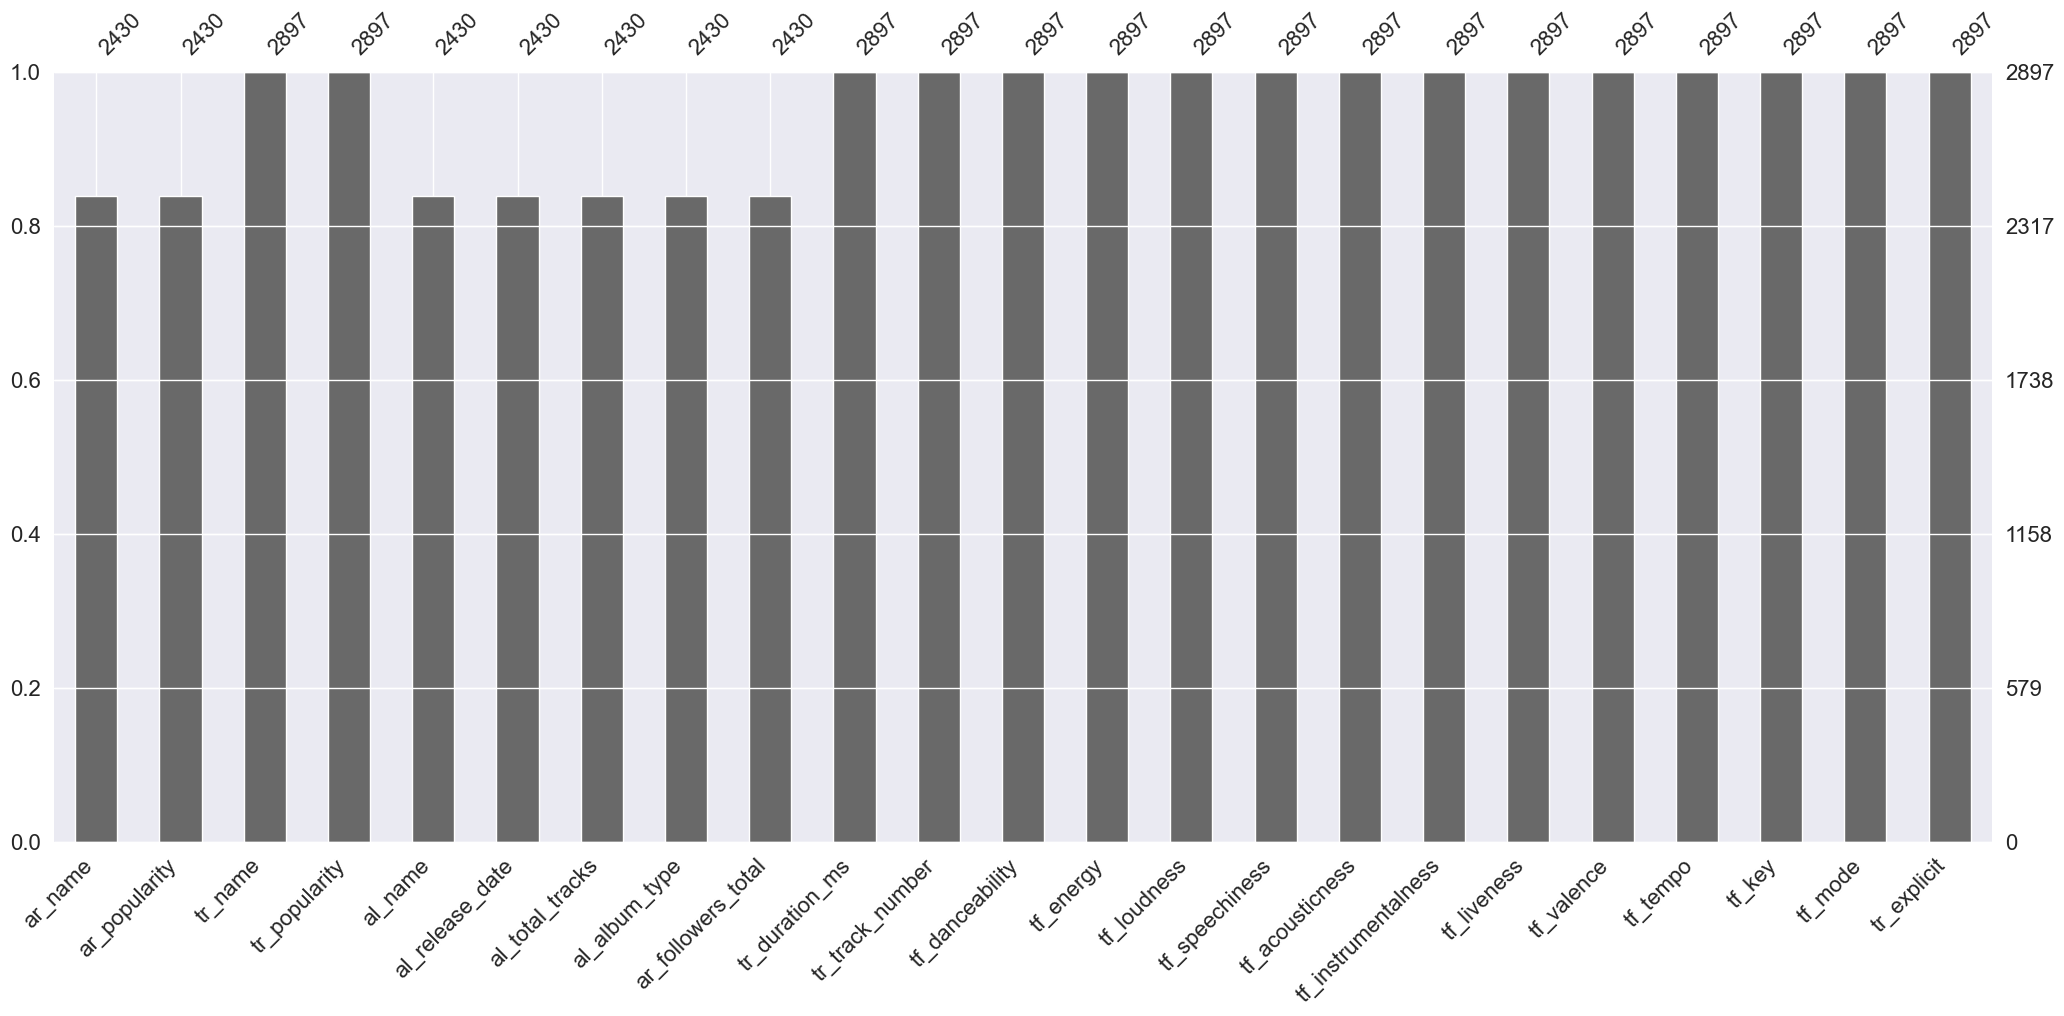

In [40]:
#Visualizing the completness of the dataset , bar chart of missing values
import missingno as msno
msno.bar(full)


## Visualize the locations of missing values
### it describes the nullity in the dataset and appears blank wherever there are missing values
### the sparkline on the right summarizes the general shape of data completness and points out the row with the 
### minimum number of null values in the DataFrame and the total amount of columns

<AxesSubplot: >

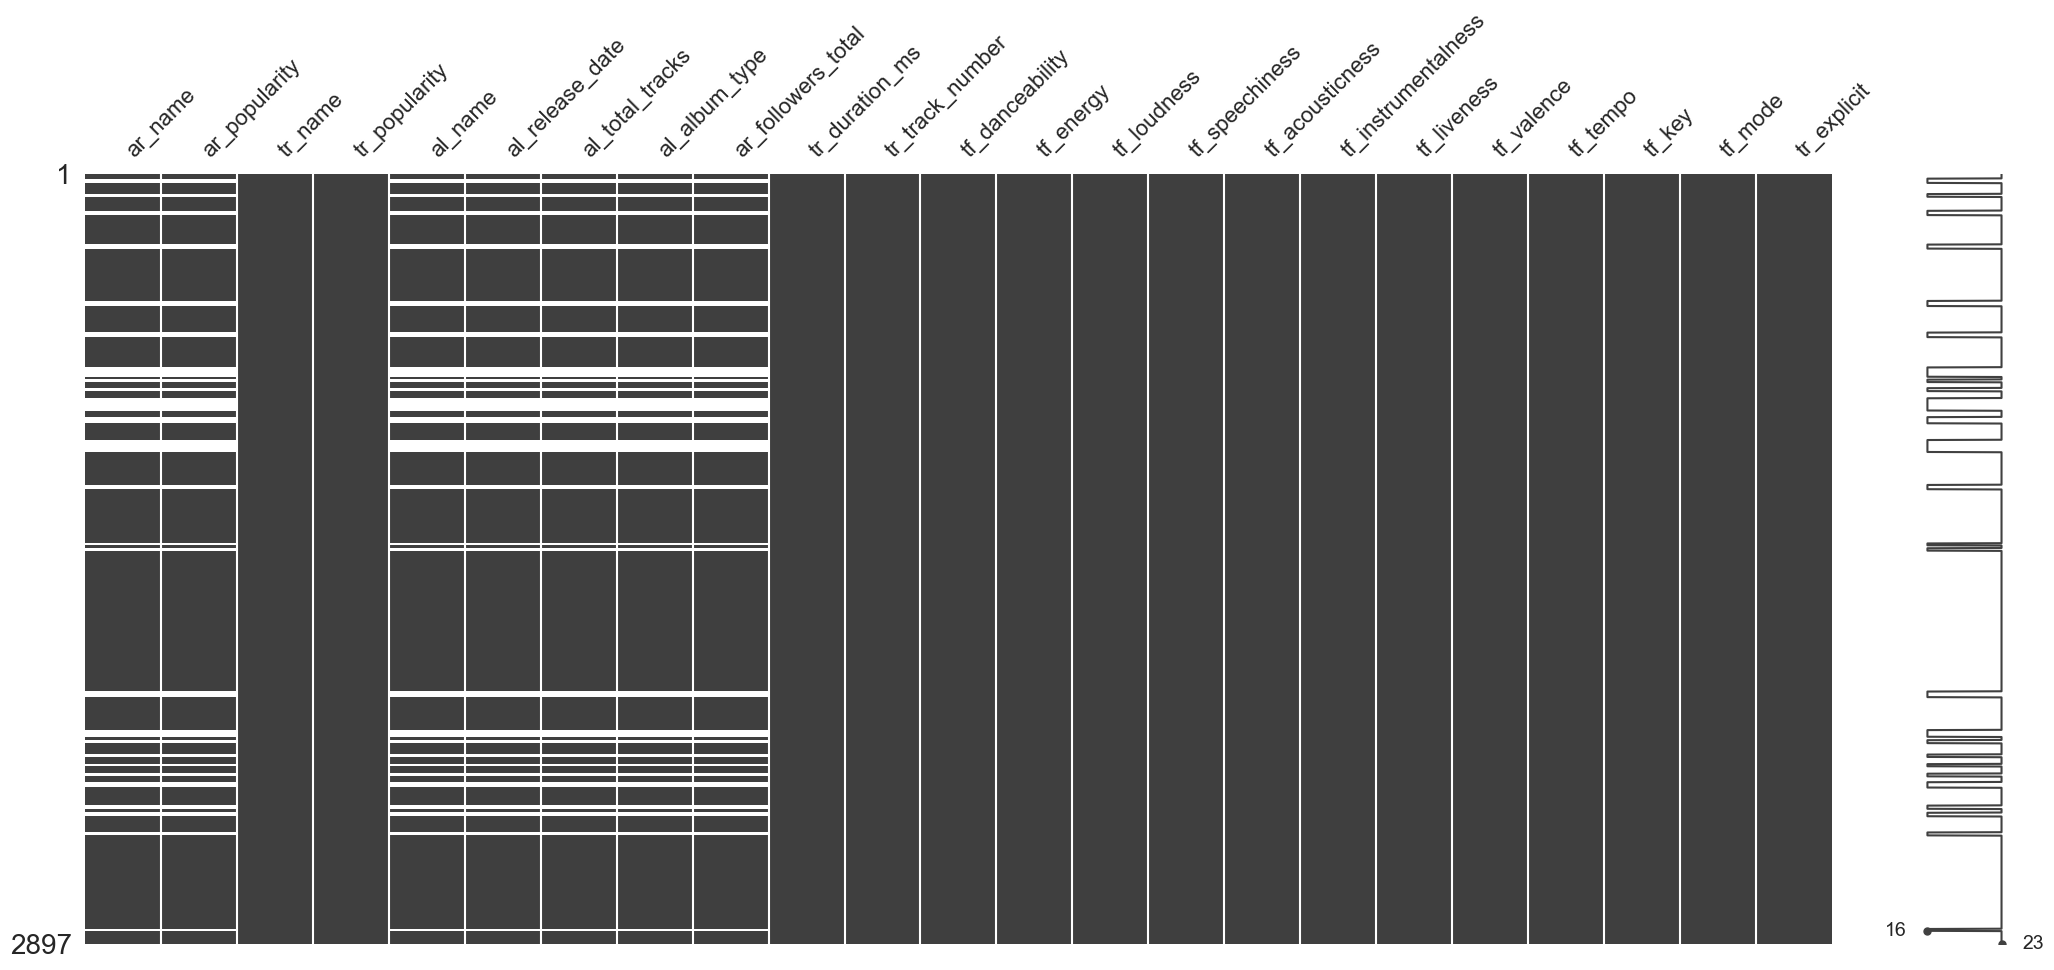

In [41]:
msno.matrix(full)

# Missingness HeatMap

<AxesSubplot: >

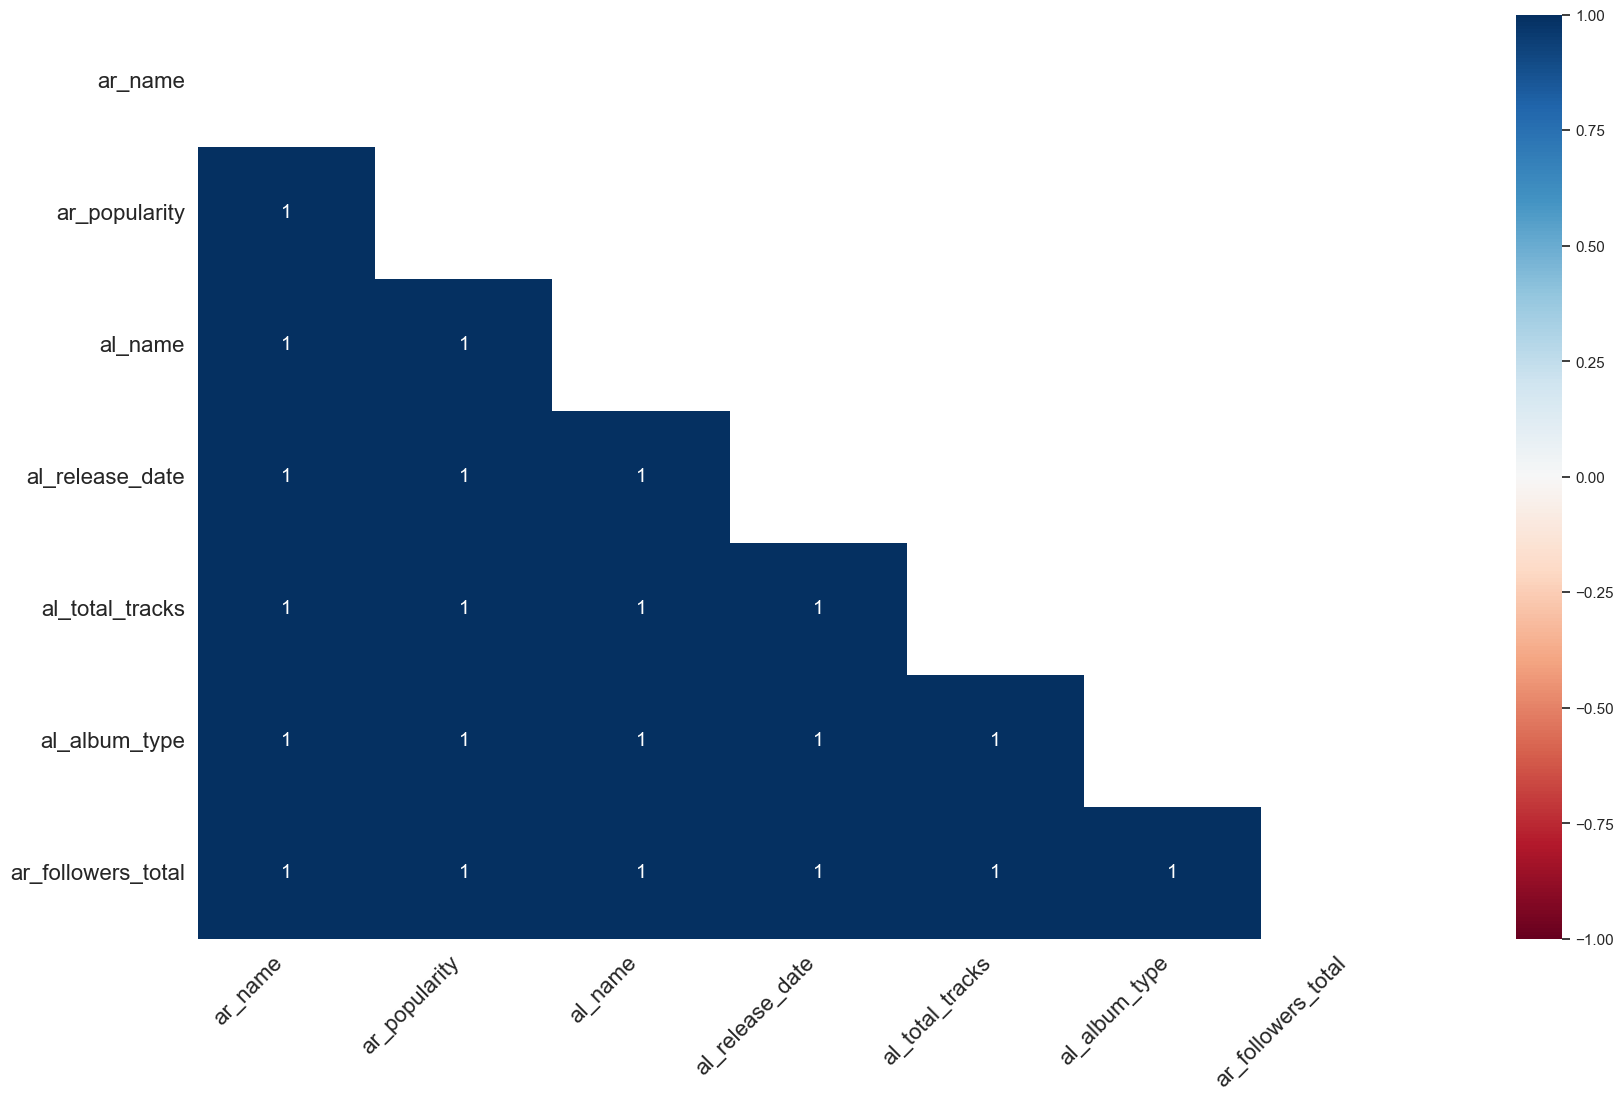

In [42]:
msno.heatmap(full)

<AxesSubplot: >

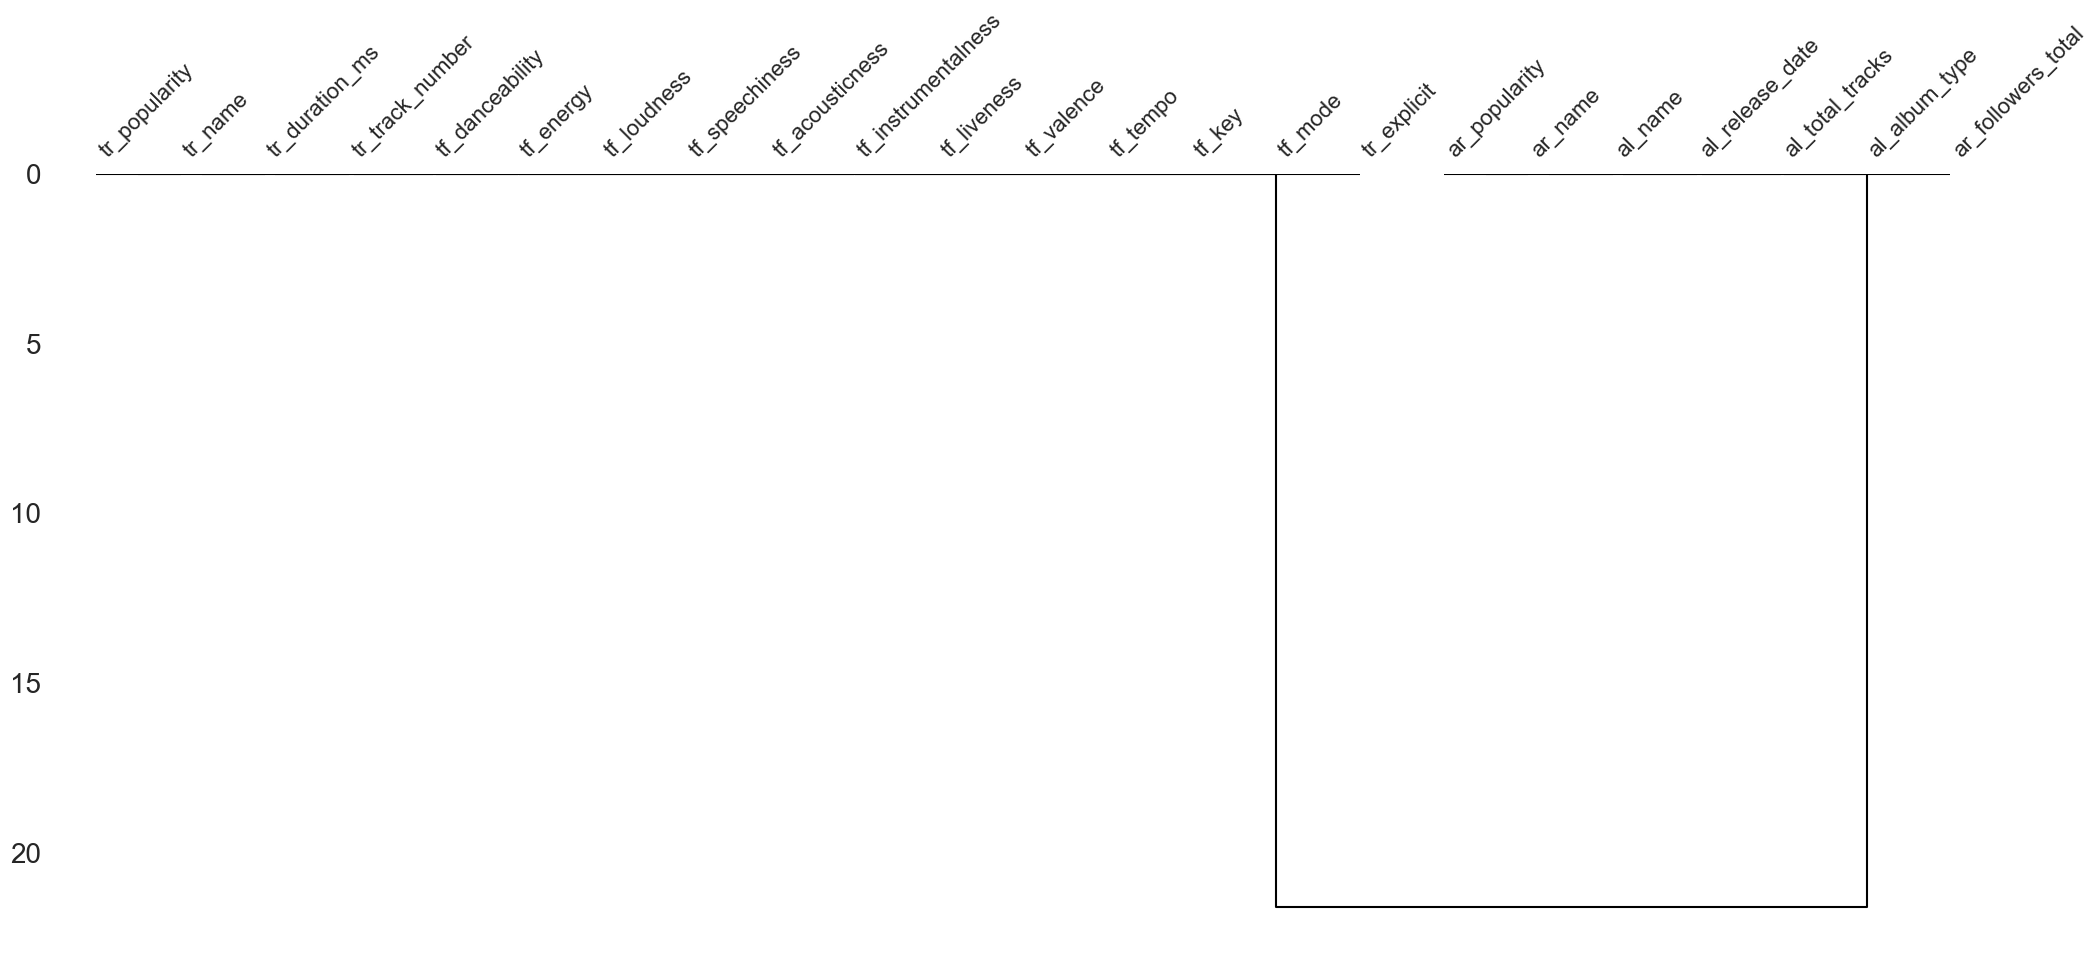

In [43]:
msno.dendrogram(full)

## creating 3 null dataframes  out of the original to play around with missing values using machine learning imputing techniques and misc imputing techniques as well

In [44]:
null_dataframe=full_renamed
null_data_knn=full_renamed
null_data_mice=full_renamed


## MACHINE LEARNING TECHNIQUES TO IMPUTE MISSING VALUES

### Ordinal Encoding

### Convert non-missing categorical columns to ordinal values

In [47]:
#Automate encoding in all categorical columns of DataFrame

from sklearn.preprocessing import OrdinalEncoder
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in null_data_knn:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = null_data_knn[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    null_data_knn.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [48]:
null_data_knn.head(2)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
0,4.0,4.0,353.0,41.0,88.0,122.0,10.0,0.0,5.0,18.0,0.0,219.0,400.0,106.0,686.0,1502.0,1090.0,845.0,41.0,169.0,5.0,0.0,0.0
1,4.0,4.0,78.0,43.0,88.0,122.0,10.0,0.0,5.0,822.0,1.0,154.0,493.0,1536.0,651.0,1125.0,900.0,801.0,138.0,1338.0,7.0,1.0,0.0


## KNN imputing method

In [49]:

#impute missing values , using KNN machine learning method,then reconvert to categorical ones

from fancyimpute import KNN

# Create KNN imputer
KNN_imputer = KNN()

# Impute and round the users DataFrame
null_data_knn.iloc[:, :] = np.round(KNN_imputer.complete(null_data_knn))

# Loop over the column names in users
for col_name in null_data_knn:
    
    # Reshape the data
    reshaped = null_data_knn[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    null_data_knn[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

ModuleNotFoundError: No module named 'fancyimpute'

In [ ]:
null_data_knn.head(2)

## IterativeImputer imputing method

In [56]:
#Automate encoding in all categorical columns of DataFrame

from sklearn.preprocessing import OrdinalEncoder
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in null_data_mice:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = null_data_mice[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    null_data_mice.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [57]:
#impute missing values , using IterativeImputer machine learning method,then reconvert to categorical ones

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  

# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

#Multiple imputations by Chained Equations (MICE)
#MICE performs multiple regression for imputing, robust model for imputation

mice_impute = IterativeImputer()

# Impute and round the users DataFrame
null_data_mice.iloc[:, :] = np.round(mice_impute.fit_transform(null_data_mice))

# Loop over the column names in users
for col_name in null_data_mice:
    
    # Reshape the data
    reshaped = null_data_mice[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    null_data_mice[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

In [58]:
null_data_mice.head(2)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
0,4.0,4.0,353.0,41.0,88.0,122.0,10.0,0.0,5.0,18.0,0.0,219.0,400.0,106.0,686.0,1502.0,1090.0,845.0,41.0,169.0,5.0,0.0,0.0
1,4.0,4.0,78.0,43.0,88.0,122.0,10.0,0.0,5.0,822.0,1.0,154.0,493.0,1536.0,651.0,1125.0,900.0,801.0,138.0,1338.0,7.0,1.0,0.0


# Imputing Techniques

# 1st technique, fillna method

In [59]:
#imputing popularity column with value of choice

null_dataframe["ar_popularity"][17:33]=null_dataframe["ar_popularity"][17:33].fillna("77")
null_dataframe.iloc[17:33].head(2)

C:\Users\domna\AppData\Local\Temp\ipykernel_14228\1188425288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_dataframe["ar_popularity"][17:33]=null_dataframe["ar_popularity"][17:33].fillna("77")


,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
17,4.0,3.0,353.0,25.0,75.0,37.0,19.0,0.0,4.0,18.0,0.0,219.0,400.0,106.0,686.0,1502.0,1090.0,845.0,41.0,169.0,5.0,0.0,0.0
18,4.0,3.0,78.0,28.0,70.0,52.0,11.0,0.0,4.0,822.0,1.0,154.0,493.0,1536.0,651.0,1125.0,900.0,801.0,138.0,1338.0,7.0,1.0,0.0


# 2nd technique, replace method

In [60]:
null_dataframe["ar_popularity"][75:86]=null_dataframe["ar_popularity"][75:86].replace(np.nan,77)

null_dataframe.iloc[75:86].head(2)

C:\Users\domna\AppData\Local\Temp\ipykernel_14228\35758447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_dataframe["ar_popularity"][75:86]=null_dataframe["ar_popularity"][75:86].replace(np.nan,77)


,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
75,4.0,3.0,844.0,50.0,76.0,59.0,3.0,0.0,4.0,1748.0,0.0,172.0,364.0,981.0,314.0,1103.0,315.0,300.0,286.0,1085.0,7.0,1.0,0.0
76,3.0,3.0,1455.0,52.0,76.0,52.0,5.0,0.0,4.0,845.0,1.0,57.0,470.0,1238.0,657.0,611.0,123.0,289.0,470.0,2216.0,7.0,0.0,0.0


In [61]:
#imputing artist name column with with "artist name" of  choice
null_dataframe["ar_name"][75:80]=null_dataframe["ar_name"][75:80].replace(np.nan,"Iron Maiden")
null_dataframe.iloc[75:80].head(2)

C:\Users\domna\AppData\Local\Temp\ipykernel_14228\3111246663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_dataframe["ar_name"][75:80]=null_dataframe["ar_name"][75:80].replace(np.nan,"Iron Maiden")


,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
75,4.0,3.0,844.0,50.0,76.0,59.0,3.0,0.0,4.0,1748.0,0.0,172.0,364.0,981.0,314.0,1103.0,315.0,300.0,286.0,1085.0,7.0,1.0,0.0
76,3.0,3.0,1455.0,52.0,76.0,52.0,5.0,0.0,4.0,845.0,1.0,57.0,470.0,1238.0,657.0,611.0,123.0,289.0,470.0,2216.0,7.0,0.0,0.0


# 3rd method replace rows based on criteria of other rows

In [62]:
#imputing artist name column with "artist name" of  choice
null_dataframe["ar_name"]=np.where(null_dataframe["ar_popularity"]==77,
                                            null_dataframe["ar_name"].fillna('Iron Maiden'),
                                            null_dataframe["ar_popularity"])

null_dataframe.iloc[76:86].head(2)


,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tf_key,mode,tr_explicit
76,3.0,3.0,1455.0,52.0,76.0,52.0,5.0,0.0,4.0,845.0,1.0,57.0,470.0,1238.0,657.0,611.0,123.0,289.0,470.0,2216.0,7.0,0.0,0.0
77,3.0,3.0,1651.0,40.0,80.0,63.0,7.0,0.0,4.0,1410.0,2.0,92.0,393.0,933.0,726.0,1224.0,251.0,290.0,137.0,293.0,2.0,1.0,0.0


## ADDING NEW FEATURES(variables)

In [63]:
#Creating new dataframe new_features_added
new_features_added=full

### Creating feature "lyrics"

In [64]:
con = [
    (new_features_added["tf_instrumentalness"]>0.800) & (new_features_added["tf_speechiness"]<0.0400 ),
    new_features_added["tf_instrumentalness"]<0.800 ,
]

In [65]:
out = ["no_lyrics", "lyrics"]

In [66]:
result = np.select(con, out)
#pd.Series(result)

<AxesSubplot: xlabel='have_lyrics'>

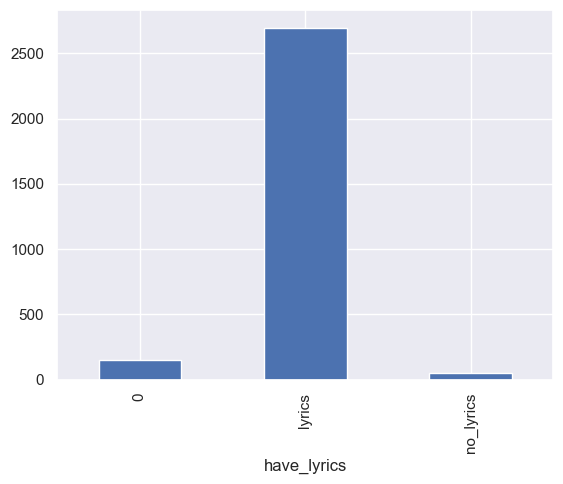

In [67]:
#visualizing how many tracks do have lyrics or not
new_features_added["have_lyrics"]=result
new_features_added.groupby("have_lyrics")["ar_name"].size().plot(kind="bar")


### Creating feature "tracks_per_artist"

In [68]:
#This option will give you a column with repeated values of the counts,


z = new_features_added['ar_name'].value_counts() 

#converts to dictionary
z1 = z.to_dict() 

new_features_added['tracks_per_artist'] = new_features_added['ar_name'].map(z1) 
new_features_added.head(1)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit,have_lyrics,tracks_per_artist
0,Iron Maiden,77.0,"Churchill’s Speech - Live in Mexico City, Pala...",41,"Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,17.0,album,6201079.0,38826,1,0.338,0.904,-12.851,0.161,0.433,0.134,0.91,0.0394,85.128,5,0,False,lyrics,557.0


In [69]:
# checking total tracks per artist

new_features_added.groupby("ar_name")["tracks_per_artist"].count().sort_values(ascending=False)


ar_name
Metallica             815
Iron Maiden           557
Blind Guardian        318
Iced Earth            275
Bruce Dickinson       215
Demons & Wizards      129
Theatre Of Tragedy    121
Name: tracks_per_artist, dtype: int64

In [70]:
#Filtering DataFrame by ar_name & total tracks per artist

new_features_added.groupby(["ar_name","tracks_per_artist"]).sum().sort_values(by="tracks_per_artist",ascending=False)



,,ar_popularity,tr_popularity,al_total_tracks,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit
ar_name,tracks_per_artist,,,,,,,,,,,,,,,,,,
Metallica,815.0,69275.0,25131,45459.0,1.406517e+10,282123231,6230,276.8828,700.6634,-6205.655,79.6448,63.936490,237.252963,359.9055,256.4599,98642.882,4438,475,109
Iron Maiden,557.0,42889.0,16619,7916.0,3.454001e+09,203571455,3063,146.5976,518.8380,-3053.089,66.6405,21.441015,33.009253,295.3101,168.3856,67440.921,2755,256,20
Blind Guardian,318.0,18762.0,6286,5472.0,1.623269e+08,104592564,2736,111.0342,273.4490,-2228.764,29.8987,28.238932,72.506977,128.6652,73.6559,41781.113,1816,133,0
Iced Earth,275.0,14850.0,5180,4851.0,7.591760e+07,84382884,1799,110.3740,240.8403,-2097.705,35.1026,9.945971,61.591387,80.2524,75.1842,33802.810,1722,155,5
Bruce Dickinson,215.0,12040.0,2964,4643.0,9.090350e+07,62866301,1426,91.0200,175.3090,-1500.627,13.8913,4.478441,8.361390,65.0952,80.6989,26910.741,1108,111,1
Demons & Wizards,129.0,5934.0,2009,2347.0,1.144333e+07,41612253,1095,60.0520,110.6080,-928.892,9.8544,5.051896,46.942756,19.0768,39.1904,15958.258,725,55,0
Theatre Of Tragedy,121.0,5566.0,2189,1311.0,1.549538e+07,36450776,652,58.2210,94.1520,-840.033,5.6351,4.165038,32.091539,40.0006,44.0761,14428.199,576,64,0


## CREATING DATAFRAMES FILTERED BY NEW ADDED FEATURES

### Creating "no_lyr" DataFrame , consisting of non lyrics track

In [71]:
no_lyr=new_features_added[new_features_added["have_lyrics"]=="no_lyrics"]

In [72]:
no_lyr.shape


(52, 25)

### Creating "lyr" DataFrame, consisting of tracks with lyrics

In [73]:
lyr=new_features_added[new_features_added["have_lyrics"]=="lyrics"]

In [74]:
lyr.shape


(2698, 25)

### Creating "explicit" DataFrame, consisting of tracks with explicit lyrics

In [75]:
explicit=new_features_added[new_features_added["tr_explicit"]==True]

In [76]:
explicit.shape

(154, 25)

In [77]:
explicit.head(2)

,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit,have_lyrics,tracks_per_artist
13,Iron Maiden,77.0,"Iron Maiden - Live in Mexico City, Palacio de ...",35,"Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,17.0,album,6201079.0,330981,5,0.137,0.992,-5.179,0.236,0.00171,0.0126,0.891,0.148,183.261,9,0,True,lyrics,557.0
30,NaN,NaN,"Iron Maiden - Live in Mexico City, Palacio de ...",20,NaN,NaN,NaN,NaN,NaN,330981,14,0.137,0.992,-5.179,0.236,0.00171,0.0126,0.891,0.148,183.261,9,0,True,lyrics,NaN


### Creating "non_explicit" DataFrame,, consisting of tracks with non explicit lyrics

In [78]:
non_explicit=new_features_added[new_features_added["tr_explicit"]==False]

In [79]:
non_explicit.shape

(2743, 25)

## ENCODING ADDED FEATURES("lyrics,explicit_lyrics"), IN BINARY VARIABLES

#### encoding is used to enable further analysis , in order to examine IF & HOW new, added feautres are correlated with each other,
#### but to the rest of the feautures as well.

## Encoding variable "lyrics"

In [80]:
#  1=lyrics & 0=no_lyrics    

#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
new_features_added["lyr_encoded"]=le.fit_transform(new_features_added["have_lyrics"])

## Encoding variable "explicit_lyrics"

In [81]:
#  1=explicit & 0=non_explicit

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
new_features_added["explicit_encoded"]=le.fit_transform(new_features_added["tr_explicit"])

In [82]:
#Inspecting shape after encoding variables

new_features_added.shape

(2897, 27)

In [83]:
new_features_added.head(1)


,ar_name,ar_popularity,tr_name,tr_popularity,al_name,al_release_date,al_total_tracks,al_album_type,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_key,tf_mode,tr_explicit,have_lyrics,tracks_per_artist,lyr_encoded,explicit_encoded
0,Iron Maiden,77.0,"Churchill’s Speech - Live in Mexico City, Pala...",41,"Nights of the Dead, Legacy of the Beast: Live ...",2020-11-20,17.0,album,6201079.0,38826,1,0.338,0.904,-12.851,0.161,0.433,0.134,0.91,0.0394,85.128,5,0,False,lyrics,557.0,1,0


In [84]:
#creating a new DataFrame "features" including only quantative data thus the  encoded variables as well
#"features" DataFrame will also be later used for machine learning models

features=new_features_added[["ar_popularity","tr_popularity","al_total_tracks",
"ar_followers_total","tr_duration_ms","tr_track_number","tf_danceability","tf_energy","tf_loudness",
"tf_speechiness","tf_acousticness","tf_instrumentalness","tf_liveness","tf_valence","tf_tempo","tf_mode","tf_key",
   "lyr_encoded","explicit_encoded","tracks_per_artist"]]

## C.EXLPLORATORY DATA ANALYSIS

### EXAMINING CORRELATIONS

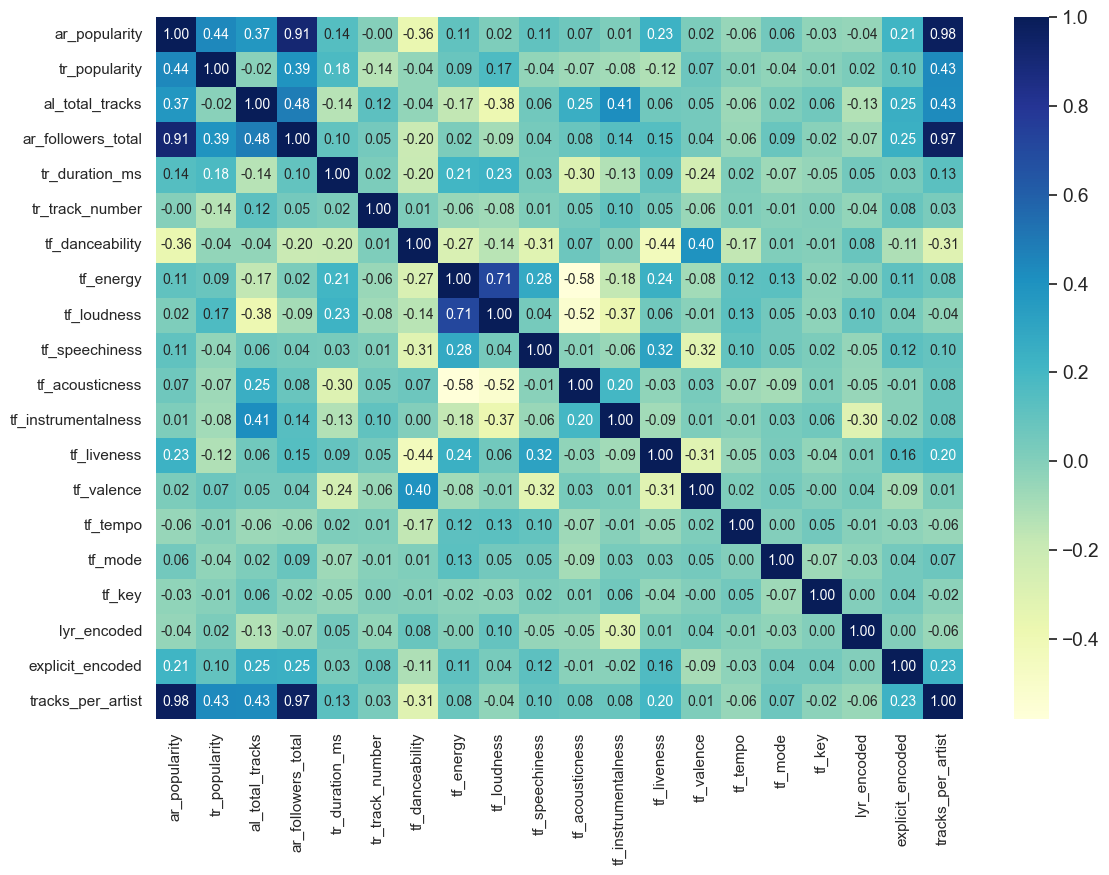

In [85]:
corr = features.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt='.2f', annot_kws={'size': 10})
plt.tight_layout()


In [86]:
corr.style.background_gradient().set_precision(2)

,ar_popularity,tr_popularity,al_total_tracks,ar_followers_total,tr_duration_ms,tr_track_number,tf_danceability,tf_energy,tf_loudness,tf_speechiness,tf_acousticness,tf_instrumentalness,tf_liveness,tf_valence,tf_tempo,tf_mode,tf_key,lyr_encoded,explicit_encoded,tracks_per_artist
ar_popularity,1.00,0.44,0.37,0.91,0.14,-0.00,-0.36,0.11,0.02,0.11,0.07,0.01,0.23,0.02,-0.06,0.06,-0.03,-0.04,0.21,0.98
tr_popularity,0.44,1.00,-0.02,0.39,0.18,-0.14,-0.04,0.09,0.17,-0.04,-0.07,-0.08,-0.12,0.07,-0.01,-0.04,-0.01,0.02,0.10,0.43
al_total_tracks,0.37,-0.02,1.00,0.48,-0.14,0.12,-0.04,-0.17,-0.38,0.06,0.25,0.41,0.06,0.05,-0.06,0.02,0.06,-0.13,0.25,0.43
ar_followers_total,0.91,0.39,0.48,1.00,0.10,0.05,-0.20,0.02,-0.09,0.04,0.08,0.14,0.15,0.04,-0.06,0.09,-0.02,-0.07,0.25,0.97
tr_duration_ms,0.14,0.18,-0.14,0.10,1.00,0.02,-0.20,0.21,0.23,0.03,-0.30,-0.13,0.09,-0.24,0.02,-0.07,-0.05,0.05,0.03,0.13
tr_track_number,-0.00,-0.14,0.12,0.05,0.02,1.00,0.01,-0.06,-0.08,0.01,0.05,0.10,0.05,-0.06,0.01,-0.01,0.00,-0.04,0.08,0.03
tf_danceability,-0.36,-0.04,-0.04,-0.20,-0.20,0.01,1.00,-0.27,-0.14,-0.31,0.07,0.00,-0.44,0.40,-0.17,0.01,-0.01,0.08,-0.11,-0.31
tf_energy,0.11,0.09,-0.17,0.02,0.21,-0.06,-0.27,1.00,0.71,0.28,-0.58,-0.18,0.24,-0.08,0.12,0.13,-0.02,-0.00,0.11,0.08
tf_loudness,0.02,0.17,-0.38,-0.09,0.23,-0.08,-0.14,0.71,1.00,0.04,-0.52,-0.37,0.06,-0.01,0.13,0.05,-0.03,0.10,0.04,-0.04
tf_speechiness,0.11,-0.04,0.06,0.04,0.03,0.01,-0.31,0.28,0.04,1.00,-0.01,-0.06,0.32,-0.32,0.10,0.05,0.02,-0.05,0.12,0.10


## PLOTTING ECDF's

##  Ecdf danceability


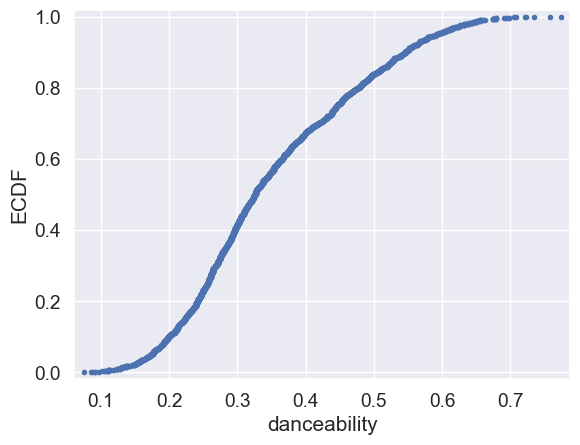

In [87]:
#60% of the tracks have 40% or less danceability meaning that only 40% of tracks have danceabilty >60%
x=np.sort(full["tf_danceability"])
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker=".",linestyle="none")
_=plt.xlabel("danceability")
_=plt.ylabel("ECDF")
plt.margins(0.02)
plt.show()


##  Ecdf valence

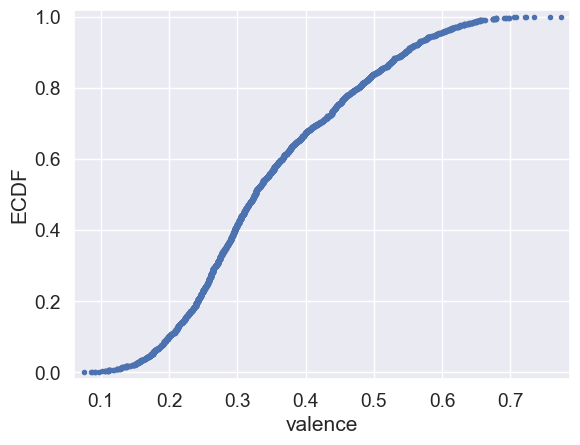

In [88]:
#50% of the tracks have 40% or less valence  

np.sort(full["tf_valence"])
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker=".",linestyle="none")
_=plt.xlabel("valence")
_=plt.ylabel("ECDF")
plt.margins(0.02)
plt.show()

## Ecdf of track popularity

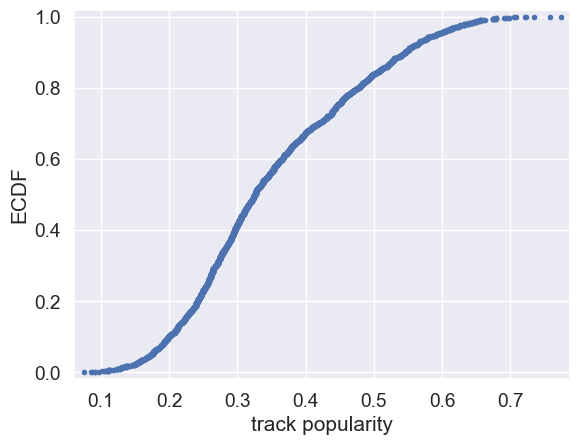

In [89]:

#80% of the tracks have more than 50% popularity

np.sort(full["tr_popularity"])
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker=".",linestyle="none")
_=plt.xlabel("track popularity")
_=plt.ylabel("ECDF")
plt.margins(0.02)
plt.show()

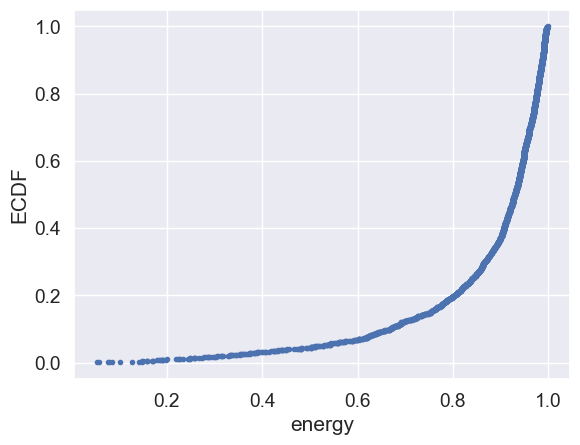

In [90]:
#20% of the tracks have 40% or less energy level

x=np.sort(full["tf_energy"])
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker=".",linestyle="none")
_=plt.xlabel("energy")
_=plt.ylabel("ECDF")
#plt.margins(0.02)
#plt.show()

In [91]:
def ecdf(dataframe):
    
    """Compute ECDF """
    # Number of data points: n
    n = len(dataframe)

    # x-data for the ECDF: x
    x = np.sort(dataframe)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

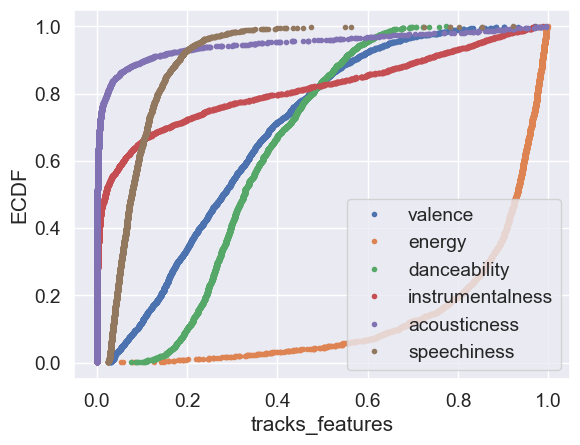

In [92]:
#COMPARISON OF ECDF's
# Compute ECDFs

x_val, y_val=ecdf(new_features_added["tf_valence"])
x_enrg, y_enrg=ecdf(new_features_added["tf_energy"])
x_danc,y_danc=ecdf(new_features_added["tf_danceability"])
x_instr,y_instr=ecdf(new_features_added["tf_instrumentalness"])

x_acoust,y_acoust=ecdf(new_features_added["tf_acousticness"])
x_speech,y_speech=ecdf(new_features_added["tf_speechiness"])





# Plot all ECDFs on the same plot

_ = plt.plot(x_val, y_val, marker = '.', linestyle = 'none')
_ = plt.plot(x_enrg, y_enrg, marker = '.', linestyle = 'none')
_ = plt.plot(x_danc,y_danc, marker = '.', linestyle = 'none')
_ = plt.plot(x_instr,y_instr, marker = '.', linestyle = 'none')
_ = plt.plot(x_acoust,y_acoust, marker = '.', linestyle = 'none')
_ = plt.plot(x_speech,y_speech, marker = '.', linestyle = 'none')




# Annotate the plot
plt.legend(('valence', 'energy', 'danceability','instrumentalness','acousticness','speechiness','loudness'), loc='lower right')
_ = plt.xlabel('tracks_features')
_ = plt.ylabel('ECDF')


plt.show()

## Ecdf "explicit lyrics" feauture

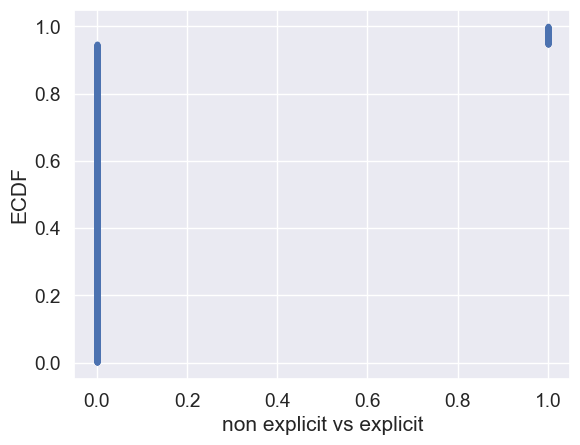

In [93]:
#  1=explicit & 0=non_explicit
#Only a few songs contain explicit content

x=np.sort(full["explicit_encoded"])
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker=".",linestyle="none")
_=plt.xlabel("non explicit vs explicit")
_=plt.ylabel("ECDF")
#plt.margins(0.02)
#plt.show()

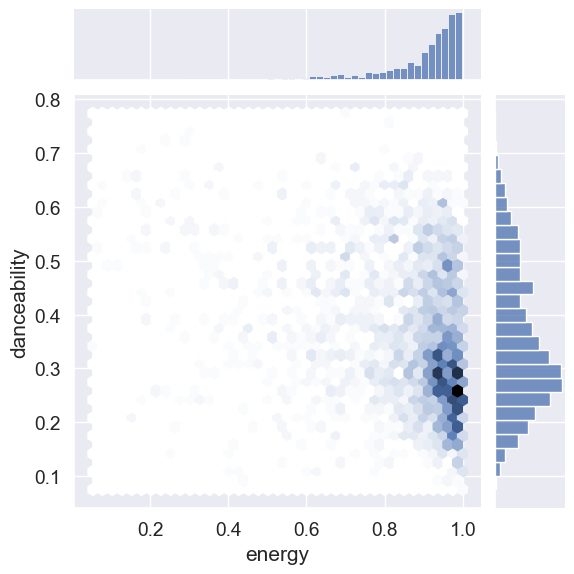

In [94]:
#Most numbers of songs have energy between 0.8-1 while most songs are Not danceable
sns.jointplot(x="tf_energy",y="tf_danceability",data=full[["tf_energy","tf_danceability"]],
              kind="hex").set_axis_labels("energy","danceability")

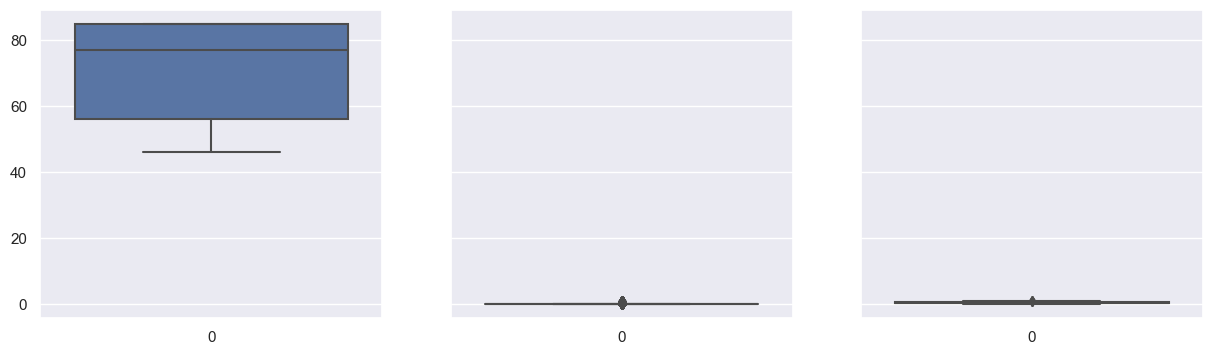

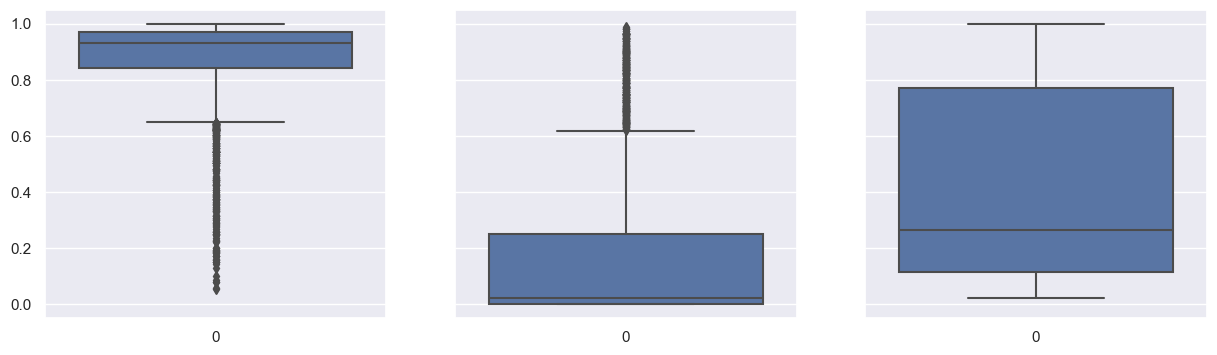

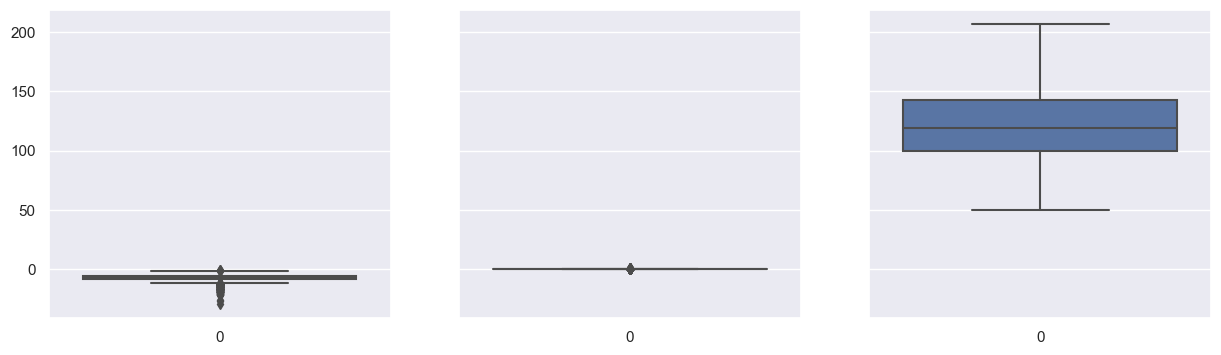

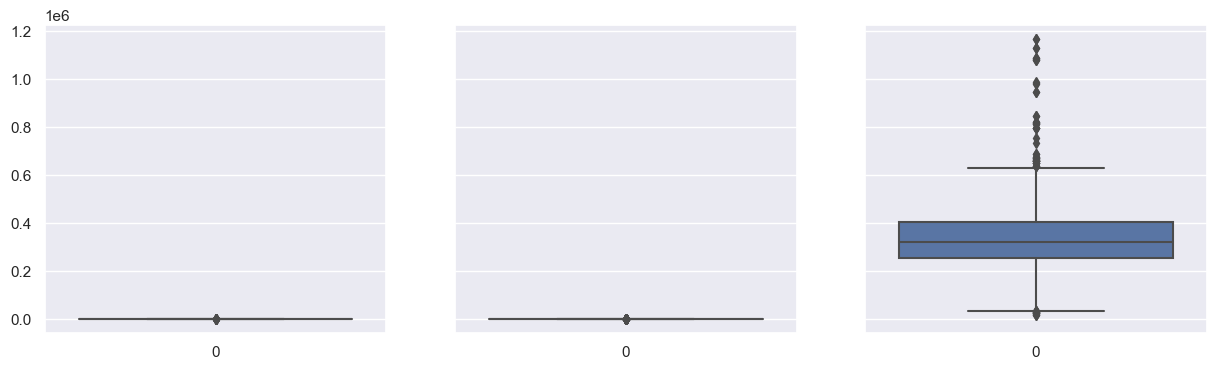

In [95]:
#Boxploting features

sns.set() # Used to set the default seaborn theme, scaling and colour pallete 

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.boxplot(full['ar_popularity'], ax=axes[0])
sns.boxplot(full['tf_acousticness'], ax=axes[1])
sns.boxplot(full['tf_danceability'], ax=axes[2])


f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.boxplot(full['tf_energy'], ax=axes[0])
sns.boxplot(full['tf_instrumentalness'], ax=axes[1])
sns.boxplot(full['tf_liveness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.boxplot(full['tf_loudness'], ax=axes[0])
sns.boxplot(full['tf_speechiness'], ax=axes[1])
sns.boxplot(full['tf_tempo'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.boxplot(full['tf_valence'], ax=axes[0])
sns.boxplot(full['tr_track_number'], ax=axes[1])
sns.boxplot(full['tr_duration_ms'], ax=axes[2])



plt.show()

## CLEANING DATA AND PREPROCESSING

In [96]:
#checking num values after feature engineering
new_features_added.isnull().values.sum()

3736

In [97]:
new_features_added.isnull().sum()

ar_name                467
ar_popularity          467
tr_name                  0
tr_popularity            0
al_name                467
al_release_date        467
al_total_tracks        467
al_album_type          467
ar_followers_total     467
tr_duration_ms           0
tr_track_number          0
tf_danceability          0
tf_energy                0
tf_loudness              0
tf_speechiness           0
tf_acousticness          0
tf_instrumentalness      0
tf_liveness              0
tf_valence               0
tf_tempo                 0
tf_key                   0
tf_mode                  0
tr_explicit              0
have_lyrics              0
tracks_per_artist      467
lyr_encoded              0
explicit_encoded         0
dtype: int64

In [98]:
#creating a new dataframe consisting of all the null entries including new features

null_data = new_features_added[new_features_added.isnull().any(axis=1)]
null_data.shape

(467, 27)

In [ ]:
null_data.head(1)

## Inspecting null data for later investigation

In [ ]:
#null_data.index.tolist()

## ANALYSING DATA, FINDING PATTERNS, MAKING AD HOC QUERIES

### Creating "analysis" DataFrame that will be used for ad hoc queries.

In [ ]:
analysis=new_features_added

## Classifying features --same method can be applied to all features

In [ ]:
high_danc=analysis['tf_danceability']>=0.70
med_danc=(analysis['tf_danceability']>=0.5) & (analysis['tf_danceability']<0.70)
low_danc=analysis['tf_danceability']<0.49



In [ ]:
data=[high_danc.sum(),med_danc.sum(),low_danc.sum()]
danc=pd.DataFrame(data,columns=['counts'],
                   index=['High danceability','Medium Danceability','Low Danceability'])
danc



## Tracks per Artist

## Plotting artists

In [ ]:
analysis.ar_name.value_counts().head(20).plot(kind='barh')
plt.title('Total Tracks per Artist')
plt.show()

## Comparing the DataFrames that were created previously based on feature engineering

### lyrics VS no_lyrics

In [ ]:
first = pd.DataFrame(lyr.mean(),columns= ['lyrics'])
sec = pd.DataFrame(no_lyr.mean(),columns= ['no_lyrics'])

comparing_lyrics_vs_no_lyrics = pd.concat([first,sec], axis=1)
comparing_lyrics_vs_no_lyrics




### explicit VS non_explicit

In [ ]:


first = pd.DataFrame(explicit.mean(),columns= ['explicit_lyrics'])
sec = pd.DataFrame(non_explicit.mean(),columns= ['non_explicit_lyrics'])

comparing_eng_vs_greek = pd.concat([first,sec], axis=1)
comparing_eng_vs_greek

#  TOP 20 tracks with regards to features

In [ ]:
top_20 = analysis[['ar_name','ar_popularity','tr_name','tr_popularity','al_name','al_release_date','al_album_type',
                     'al_total_tracks', 'ar_followers_total','tr_duration_ms',
                    'tf_danceability','tf_energy','tf_loudness','tf_speechiness','tf_acousticness',
                    'tf_instrumentalness','tf_liveness','tf_valence','tf_tempo','tf_key','tf_mode','tr_explicit','al_album_type']]


## Top positive tracks

In [ ]:
top_20[['ar_name',"tr_name",'tf_valence']].sort_values(by='tf_valence',ascending=False).head(20)

## Top Sad Tracks

In [ ]:
top_20[['ar_name',"tr_name",'tf_valence']].sort_values(by='tf_valence',ascending=True).head(20)

## Top energetic Tracks

In [ ]:
top_20[['ar_name',"tr_name",'tf_energy']].sort_values(by='tf_energy',ascending=False).head(20)

## Top sluggish tracks

In [ ]:
top_20[['ar_name',"tr_name","tr_explicit"]].sort_values(by="tr_explicit",ascending=True).tail(20)

## Top accoustic Tracks

In [ ]:
top_20[['ar_name',"tr_name",'tf_acousticness']].sort_values(by='tf_acousticness',ascending=False).head(20)

## top popular tracks

In [ ]:
top_20[['ar_name',"tr_name",'tr_popularity']].sort_values(by='tr_popularity',ascending=False).head(20)

## MOST POPULAR ARTIST

In [ ]:
great=analysis
great=great.sort_values("ar_popularity",ascending=False).drop_duplicates("ar_name").sort_index()

In [ ]:
most_pop=great[["ar_name","ar_popularity"]].sort_values(by="ar_popularity",ascending=False).head(20)
most_pop

In [ ]:

most_pop.plot.bar(x="ar_name",y="ar_popularity", title="Top artist",color="green")


plt.xlabel("Artist Name")
plt.ylabel("Popularity")
plt.show()

In [ ]:
#Tracks popularity
#Creating a "track_popularity" DataFrame
track_popularity=analysis.sort_values("tr_popularity",ascending=False)

## Creating a dataframe arranging tracks by popularity

In [ ]:
track_popularity.head(10)

In [ ]:
#showing valence in boxplots
#seems Bruce Dickinson's songs to be the happiest whereas Blind Guardian seem to be less happy

plt.figure(figsize=(50,20))
sns.set(font_scale = 2)
_=sns.boxplot(x="ar_name",y="tf_valence", data=analysis)
_=plt.title('Inspecting valence in boxplots',fontsize=10)
_=plt.xlabel("ar_name",fontsize=30)
_=plt.ylabel("valence",fontsize=30)

ax.set_xticklabels(x, rotation=0, fontsize=20)

plt.show()



In [ ]:
#showing how energy is affected due to popularity
# Iron Maiden seem to have the more energetic trakcs whereas Theatre of Tragedy seem to have less energetic tracks

plt.figure(figsize=(50,20))
sns.set(font_scale = 2)
_=sns.boxplot(x="ar_name",y="tf_energy", data=analysis)
_=plt.title('Inspecting energy in boxplots',fontsize=10)
_=plt.ylabel("energy",fontsize=30)

ax.set_xticklabels(x, rotation=0, fontsize=20)

plt.show()

## Creating  a new DataFrame "norm", excluding null values.

## The DataFrame will be normalized and then used for machine learning and predictive models


In [ ]:
norm=new_features_added[["ar_popularity","tr_popularity","al_total_tracks",
"ar_followers_total","tr_duration_ms","tr_track_number","tf_danceability","tf_energy","tf_loudness",
"tf_speechiness","tf_acousticness","tf_instrumentalness","tf_liveness","tf_valence","tf_tempo","tf_mode",
  "lyr_encoded","explicit_encoded","tracks_per_artist"]]

In [ ]:
#cleaning method=dropping rows with null values

norm.dropna(inplace=True)

In [ ]:
#checking that nun values have been eradicated

norm.isnull().sum()

### Checking dataset before normalization

In [ ]:
norm.head(5)

### Applying normalization method by mean

In [ ]:
norm=norm.apply(lambda x: (x - x.mean()) / x.std())

In [ ]:
norm.aggregate(["mean","std","var"])

### Checking differentiations in values after normalization

In [ ]:
norm.head(5)

## CLUSTER ANALYSIS

In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.array(norm)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
num_clusters = 5
kmeanModel = KMeans(n_clusters=num_clusters, max_iter=10000, init='k-means++', random_state=123).fit(X)


## Covariance Matrix

In [ ]:
import numpy as np
mean_vec = np.mean(X ,axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X.T))

## Performing eigendecomposition on the covariance matrix

In [ ]:
cov_mat = np.cov(X.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

## PCA

In [ ]:
from sklearn.decomposition import PCA




pca = PCA(n_components=6, random_state=123)
pca_results = pca.fit_transform(X)



In [ ]:

print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()


In [ ]:
pca.n_components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, 
        label='Individual', axes=ax, alpha=0.4)
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum(), 
         label='Cumulative', color='#576574', axes=ax, marker='o')

ax.set_xticks(range(0,6))
ax.set_xticklabels(range(1,7), fontsize=12)
ax.set_yticklabels(range(0,90,10), fontsize=12)

plt.title('Scree Plot of PCA', fontsize=12)
plt.ylabel('Explained variance (%)', fontsize=12)
plt.xlabel('Principal components', fontsize=12)
plt.legend()
plt.show()

In [ ]:

df_pca = pd.DataFrame(pca_results)
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6']
df_pca['label'] = kmeanModel.labels_
df_pca.head()


In [ ]:


#p = ['#DC4E76', '#CC4B93']
sns.set_style('white')
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', style='label', palette='winter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Visualisation of Songs using PCA')
plt.show()

In [ ]:
norm.loc[:,'cluster'] = kmeanModel.labels_
artist_cluster_size = norm.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data= artist_cluster_size, x='cluster', y='Num of songs', color='#00BFA5')
plt.title('Distribution of clusters')
plt.show()

In [ ]:

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
           c=df_pca['label'], cmap= 'winter')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [ ]:

cluster_num = 0
df_cluster1 =norm[norm['cluster'] == cluster_num]
df_cluster1.head()
